# Biosignal analysis using Support Vector Machine algorithm



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
from datetime import timedelta

from mpl_toolkits.mplot3d import Axes3D

import biosppy

import seaborn as sns

import os

import sklearn.linear_model
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm


from collections import defaultdict

In [2]:
train_df = pd.read_csv("train_data_features_clean.csv")
test_df = pd.read_csv("test_data_features_clean.csv")

In [3]:
print(train_df.shape)
print(test_df.shape)

(2068, 366)
(518, 366)


In [4]:
train_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Participant,IRange_start,IRange_end,Activity,emg_std,emg_skew,emg_kurtosis,...,accWz_pcount,accWz_abmean,accWz_npeaks,accWz_skew,accWz_kurtosis,accWz_energy,accWz_momentum,accWx_accWy_corr,accWx_accWz_corr,accWy_accWz_corr
0,2189,2196,3309,LDM5,249305,254305,greetings,0.219113,0.562581,9.174356,...,4369.0,2899.0,112.0,-0.691043,6.420650,12.833290,0.186005,-0.073372,-0.658326,0.228056
1,76,76,81,03FH,589205,594205,run,0.252030,-0.118221,8.460107,...,2375.0,3090.0,78.0,-1.022943,0.606826,13.776845,0.247760,-0.448892,0.826102,-0.332862
2,2149,2156,3203,LAS2,1199500,1204500,run,0.459301,0.905125,7.857818,...,2232.0,2883.0,95.0,0.408045,5.166440,8.235302,0.160346,-0.221970,0.300573,-0.012344
3,2393,2400,3523,LDM5,1493455,1498455,run,0.153409,0.853207,7.885383,...,3798.0,2277.0,98.0,1.426853,5.526387,6.583364,0.096070,-0.336553,-0.315849,0.052206
4,1650,1650,2574,K2Q2,849160,854160,run,0.711148,0.281505,1.006409,...,817.0,3039.0,91.0,-0.869657,0.104454,20.832428,0.220546,0.061874,0.822796,0.236060


In [5]:
Activity_train_count = train_df['Activity'].value_counts()
Activity_train_count

run            1427
walk_before     206
walk_after      176
gesticulate     102
lift             63
greetings        42
baseline         42
jumps            10
Name: Activity, dtype: int64

In [6]:
Activity_test_count = test_df['Activity'].value_counts()
Activity_test_count

run            357
walk_before     52
walk_after      44
gesticulate     25
lift            16
baseline        11
greetings       11
jumps            2
Name: Activity, dtype: int64

# Drop columns till activity from the dataset for algorithm

In [7]:
x_train = train_df.iloc[:, 7:]
y_train = train_df.iloc[:, 6]

x_test = test_df.iloc[:, 7:]
y_test = test_df.iloc[:, 6]

print("The shape of x_train is:", x_train.shape)
print("The shape of y_train is:", y_train.shape)

print("The shape of x_test is:", x_test.shape)
print("The shape of y_test is:", y_test.shape)

The shape of x_train is: (2068, 359)
The shape of y_train is: (2068,)
The shape of x_test is: (518, 359)
The shape of y_test is: (518,)


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svm_class = svm.SVC(gamma = 0.001, kernel = 'rbf', probability=True)

pipe = Pipeline([('scaler', StandardScaler()), ('svm', svm_class)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
    
print("Accuracy is: ", accuracy) 

              precision    recall  f1-score   support

    baseline       1.00      0.45      0.62        11
 gesticulate       0.80      0.96      0.87        25
   greetings       1.00      0.82      0.90        11
       jumps       0.00      0.00      0.00         2
        lift       0.89      1.00      0.94        16
         run       0.99      0.98      0.98       357
  walk_after       0.89      0.95      0.92        44
 walk_before       0.91      0.92      0.91        52

    accuracy                           0.96       518
   macro avg       0.81      0.76      0.77       518
weighted avg       0.95      0.96      0.95       518

Accuracy is:  0.9555984555984556


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


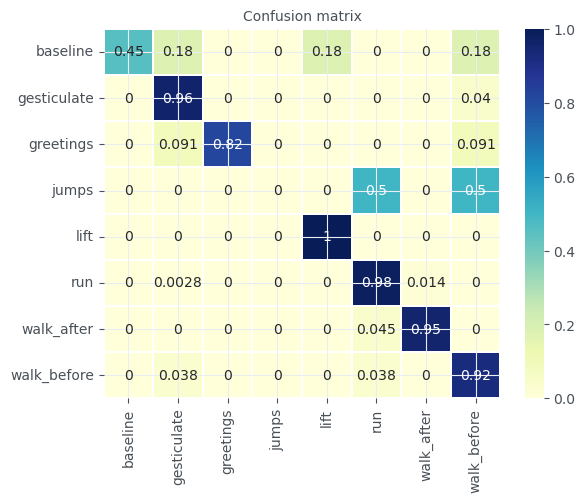

In [9]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cm, annot=True, xticklabels = pipe.classes_, yticklabels = pipe.classes_, linewidths=0.1,  cmap = 'YlGnBu')

plt.title("Confusion matrix", fontsize = 10)
plt.savefig("Confusion_Matrix_SVM", bbox_inches='tight')
plt.show()

In [10]:
y_prob = pipe.predict_proba(x_test)

loss = log_loss(y_test, y_prob)

print("Log loss:", loss)

Log loss: 0.1165252146293399


In [11]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score is:", f1)


F1 score is: 0.952321492704329


In [12]:
from sklearn.metrics import matthews_corrcoef

MCC_score = matthews_corrcoef(y_test, y_pred)
print("MCC score is:", MCC_score)

MCC score is: 0.912172567930531


#Document created by Dushyanth Sirivolu for final project for Erdos Boot Camp Spring 2024  